In [1]:
import pandas as pd


In [2]:
# Specify the path to your Excel file
file_path = 'Date Proiect 3D.xlsx'

# Read all sheets into a dictionary of DataFrames
all_sheets = pd.read_excel(file_path, sheet_name=None)


# Iterate through the dictionary of DataFrames
for sheet_name, df in all_sheets.items():
    # Add a new column with the sheet name
    df['SheetName'] = sheet_name
    
    # Assign the DataFrame to a variable named after the sheet name
    globals()[sheet_name] = df


In [3]:
# Remove the added 'SheetName' column
['Sec ID', 'SheetName']
globals()['V2-training'].drop(columns=['Sec ID', 'SheetName'], inplace=True)
globals()['V2-ext pred'].drop(columns=['Sec ID', 'SheetName'], inplace=True)

# Adding the diclofenac data to the training set
v2_df = pd.concat([globals()['V2-training'], globals()['V2-ext pred']], ignore_index=True)

# check nr de linii
assert v2_df.shape[0] == globals()['V2-training'].shape[0] + globals()['V2-ext pred'].shape[0]

# check nr de coloane
assert v2_df.shape[1] == globals()['V2-training'].shape[1] == globals()['V2-ext pred'].shape[1]

# Add the second dataset

In [15]:
# Specify the path to your Excel file
file_path_2 = 'Date 3DP_15-07-2024.xlsx'

# Read all sheets into a dictionary of DataFrames
set2 = pd.read_excel(file_path_2, 'V2-date training')
set2.drop(columns=['Sec ID'], inplace=True)


In [17]:
# Check the columns are the same between the 2 datasets
print(len(v2_df.columns))
print(v2_df.columns)
print(len(set2.columns))
print(set2.columns)
assert v2_df.columns.all() == set2.columns.all()

1523
Index(['Primary ID', 'nAcid', 'ALogP', 'ALogp2', 'AMR', 'apol', 'naAromAtom',
       'nAromBond', 'nAtom', 'nHeavyAtom',
       ...
       'ST-Peak stress (N/mp)', '3PBT-Hardness (g)',
       '3PBT-Deformation at hardness (mm)', '3PBT-Total work (mJ)',
       '3PBT-Maximum force (N)', '3PBT-Peak stress (N/mp)',
       '3PBT-Flexural stress (g/mmp) (Samaro 2021 Prasad 2019)',
       '3PBT-Flexural strain (%)', '3PBT-Breaking distance (mm)',
       '3PBT-Stiffness (N/mm) (Hu 2022)'],
      dtype='object', length=1523)
1523
Index(['Primary ID', 'nAcid', 'ALogP', 'ALogp2', 'AMR', 'apol', 'naAromAtom',
       'nAromBond', 'nAtom', 'nHeavyAtom',
       ...
       'ST-Peak stress (N/mp)', '3PBT-Hardness (g)',
       '3PBT-Deformation at hardness (mm)', '3PBT-Total work (mJ)',
       '3PBT-Maximum force (N)', '3PBT-Peak stress (N/mp)',
       '3PBT-Flexural stress (g/mmp) (Samaro 2021 Prasad 2019)',
       '3PBT-Flexural strain (%)', '3PBT-Breaking distance (mm)',
       '3PBT-Stiffness (

In [18]:
df = pd.concat([v2_df, set2], ignore_index=True)

In [19]:
# Separating X and Y
y_columns = ['ST-Hardness (g)',	'ST-Rigidity at 2% deformation (g)', 'ST-Rigidity at 4% deformation (g)', 'ST-Peak stress (N/mp)', '3PBT-Hardness (g)',	
             '3PBT-Deformation at hardness (mm)', '3PBT-Total work (mJ)', '3PBT-Maximum force (N)', '3PBT-Peak stress (N/mp)', 
             '3PBT-Flexural stress (g/mmp) (Samaro 2021 Prasad 2019)',	'3PBT-Flexural strain (%)', '3PBT-Breaking distance (mm)', '3PBT-Stiffness (N/mm) (Hu 2022)']

df.set_index('Primary ID', inplace=True)

y = df[y_columns]

X = df.drop(columns=y_columns)


In [20]:
# Identify rows with NaNs
data = pd.merge(X, y, left_index=True, right_index=True)

rows_with_nans = data.isnull().any(axis=1)
num_rows_with_nans = rows_with_nans.sum()
total_rows = len(data)
fraction_rows_with_nans = num_rows_with_nans / total_rows

print(f"Number of rows with NaNs: {num_rows_with_nans}")
print(f"Fraction of rows with NaNs: {fraction_rows_with_nans:.2f}")

# Identify columns with NaNs
columns_with_nans = data.columns[data.isnull().any()].tolist()
num_columns_with_nans = len(columns_with_nans)

print(f"Columns with NaNs: {columns_with_nans}")

# Optional: Print detailed information about NaNs in each column
nan_info = data.isnull().sum()
print("\nDetailed NaN information:")
print(nan_info[nan_info > 0])

Number of rows with NaNs: 123
Fraction of rows with NaNs: 0.07
Columns with NaNs: ['MW.1', 'Energy', 'Solvation E', 'HOMO', 'Dipol', 'Tautomeri', 'LUMO', 'Conformeri', 'Area A^2', 'Volum A^3', 'Acc area A^2', 'Min ElPot kJ/mol', 'MinLocIonPot kJ/mol', 'LogP', 'PSA A^2', 'Ovality', 'MaxElPot kJ/mo', 'Polaririzability', 'ZPE kJ/mol', 'H0', 'Cv', 'S0', 'G0', 'ST-Diam (mm)', '3PBT-Diam (mm)', '3PBT-Radius (mm)', 'ST-Hardness (g)', 'ST-Rigidity at 2% deformation (g)', 'ST-Rigidity at 4% deformation (g)', 'ST-Peak stress (N/mp)', '3PBT-Hardness (g)', '3PBT-Deformation at hardness (mm)', '3PBT-Total work (mJ)', '3PBT-Maximum force (N)', '3PBT-Peak stress (N/mp)', '3PBT-Flexural stress (g/mmp) (Samaro 2021 Prasad 2019)', '3PBT-Flexural strain (%)', '3PBT-Breaking distance (mm)', '3PBT-Stiffness (N/mm) (Hu 2022)']

Detailed NaN information:
MW.1                                                      55
Energy                                                    55
Solvation E                       

In [23]:
# Sanity checks
assert y.shape[1] == len(y_columns)
assert y.shape[0] == v2_df.shape[0] + set2.shape[0]
assert X.shape[0] == v2_df.shape[0] + set2.shape[0]

# Acelasi nr de coloane
assert globals()['V2-training'].shape[1] == globals()['V2-ext pred'].shape[1]

In [24]:
# since there are so few rows with nans we simply drop them
data = data.dropna()
y = data[y_columns]
X = data.drop(columns=y_columns)

In [25]:
X

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,Bioavailability Score,PAINS #alerts,Brenk #alerts,Leadlikeness #violations,Synthetic Accessibility,API %,Plast %,ST-Diam (mm),3PBT-Diam (mm),3PBT-Radius (mm)
Primary ID,,,,,,,,,,,,,,,,,,,,,
BCS1_S1,0,0.7160,0.512656,112.2327,60.25982,6,6,53,28,25,...,0.55,0,1,2,4.39,5,0.0,1.99,1.88,0.940
BCS1_S1,0,0.7160,0.512656,112.2327,60.25982,6,6,53,28,25,...,0.55,0,1,2,4.39,5,0.0,1.99,1.88,0.940
BCS1_S2,0,0.7160,0.512656,112.2327,60.25982,6,6,53,28,25,...,0.55,0,1,2,4.39,5,0.0,1.91,1.77,0.885
BCS1_S2,0,0.7160,0.512656,112.2327,60.25982,6,6,53,28,25,...,0.55,0,1,2,4.39,5,0.0,1.91,1.77,0.885
BCS1_S3,0,0.7160,0.512656,112.2327,60.25982,6,6,53,28,25,...,0.55,0,1,2,4.39,5,0.0,1.91,1.82,0.910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PS-S18,1,1.8296,3.347436,83.8478,39.03872,12,12,30,19,11,...,0.85,0,0,1,2.23,25,15.0,1.92,1.83,0.915
PS-S19,1,1.8296,3.347436,83.8478,39.03872,12,12,30,19,11,...,0.85,0,0,1,2.23,25,15.0,1.84,1.89,0.945
PS-S19,1,1.8296,3.347436,83.8478,39.03872,12,12,30,19,11,...,0.85,0,0,1,2.23,25,15.0,1.84,1.89,0.945


In [26]:
y

,ST-Hardness (g),ST-Rigidity at 2% deformation (g),ST-Rigidity at 4% deformation (g),ST-Peak stress (N/mp),3PBT-Hardness (g),3PBT-Deformation at hardness (mm),3PBT-Total work (mJ),3PBT-Maximum force (N),3PBT-Peak stress (N/mp),3PBT-Flexural stress (g/mmp) (Samaro 2021 Prasad 2019),3PBT-Flexural strain (%),3PBT-Breaking distance (mm),3PBT-Stiffness (N/mm) (Hu 2022)
Primary ID,,,,,,,,,,,,,
BCS1_S1,8075.0,1260.0,5550.0,25462604.0,1532.0,5.79,15.65,15.0136,5404240.0,143.916849,10.449792,5.79,2.593022
BCS1_S1,8075.0,1260.0,5550.0,25462604.0,1532.0,5.79,15.65,15.0136,5404240.0,143.916849,10.449792,5.79,2.593022
BCS1_S2,10205.0,2630.0,7460.0,34869988.0,1083.0,5.88,9.75,10.6134,4317318.0,121.908807,9.991296,5.88,1.805000
BCS1_S2,10205.0,2630.0,7460.0,34869988.0,1083.0,5.88,9.75,10.6134,4317318.0,121.908807,9.991296,5.88,1.805000
BCS1_S3,1700.0,350.0,875.0,5808817.0,1111.5,6.48,12.08,10.8927,4192343.0,115.085796,11.321856,6.48,1.680972
...,...,...,...,...,...,...,...,...,...,...,...,...,...
PS-S18,1480.0,425.0,1010.0,5004770.0,206.5,1.14,1.30,2.0237,769990.0,21.032600,2.002750,1.14,1.775180
PS-S19,1150.0,265.0,750.0,4239720.0,249.0,1.14,1.63,2.4402,868988.0,23.021900,2.068420,1.14,2.140530
PS-S19,1150.0,265.0,750.0,4239720.0,249.0,1.14,1.63,2.4402,868988.0,23.021900,2.068420,1.14,2.140530


In [27]:
non_numeric_columns = X.select_dtypes(exclude=['number']).columns
non_numeric_columns

Index([], dtype='object')

In [32]:
X.to_csv('X.csv')
y.to_csv('y.csv')

In [28]:
# test-train split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random forest regressor - multi-output

In [29]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the base model
base_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a multi-output regressor
multi_output_model = MultiOutputRegressor(base_model)

# Train the model
multi_output_model.fit(X_train, y_train)


MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

Evaluate the model

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = multi_output_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: [4.34457633e+05 5.00643834e+04 3.35970523e+05 8.31337265e+13
 6.32678907e+03 4.69822550e-02 1.48340042e+01 6.06189104e-01
 7.45726182e+10 3.71269687e+01 5.88201518e+00 4.69822550e-02
 2.10405848e-01]
R^2 Score: 0.9913277882927384


Hyperparameter tunning

In [31]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [None, 10, 20],
    'estimator__min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(multi_output_model, param_grid, cv=3, scoring='r2', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the final model with the best parameters
final_model = grid_search.best_estimator_


Best parameters: {'estimator__max_depth': 20, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 200}


Prediction and validation

In [33]:
# Predict on the test set
final_y_pred = final_model.predict(X_test)

# Calculate final metrics
final_mse = mean_squared_error(y_test, final_y_pred, multioutput='raw_values')
final_r2 = r2_score(y_test, final_y_pred, multioutput='variance_weighted')

print(f"Final Mean Squared Error: {final_mse}")
print(f"Final R^2 Score: {final_r2}")


Final Mean Squared Error: [4.39465798e+05 5.03228923e+04 3.39628441e+05 8.15182934e+13
 6.18318748e+03 4.43100131e-02 1.19047282e+01 5.93964166e-01
 7.09190640e+10 3.60070654e+01 5.53818351e+00 4.43100131e-02
 2.06756514e-01]
Final R^2 Score: 0.9914965342220828


Feature Importance for Random Forest

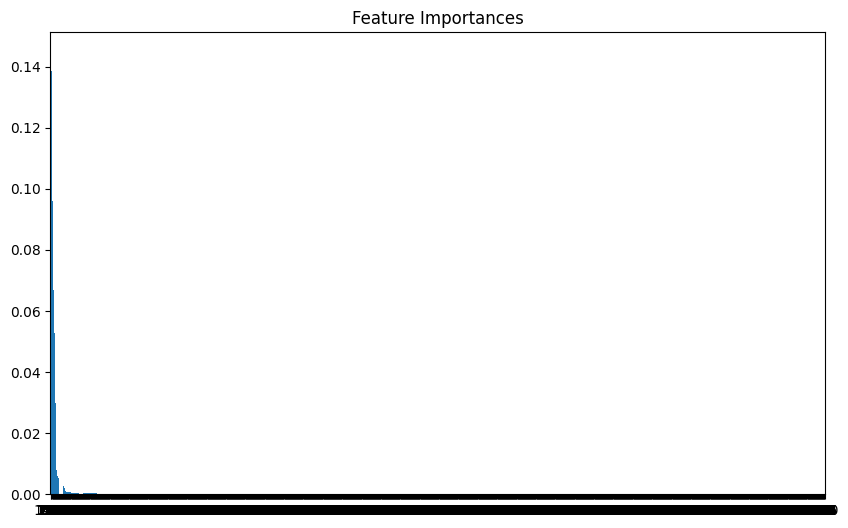

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate feature importances
importances = final_model.estimators_[0].feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()


# Multioutput GradientBoostingRegressor

In [35]:
# Try a different model
from sklearn.ensemble import GradientBoostingRegressor

# Create a new multi-output regressor with a different model
new_base_model = GradientBoostingRegressor()
new_multi_output_model = MultiOutputRegressor(new_base_model)

# Train the new model
new_multi_output_model.fit(X_train, y_train)

# Predict and evaluate again
new_y_pred = new_multi_output_model.predict(X_test)
new_mse = mean_squared_error(y_test, new_y_pred, multioutput='raw_values')
new_r2 = r2_score(y_test, new_y_pred, multioutput='variance_weighted')

print(f"New Mean Squared Error: {new_mse}")
print(f"New R^2 Score: {new_r2}")


New Mean Squared Error: [1.70046545e+06 2.49732732e+05 1.39726073e+06 4.12161152e+14
 2.85436741e+04 4.70291653e-01 9.88929007e+01 2.74073818e+00
 3.53682680e+11 2.13149248e+02 8.11729273e+00 4.69481421e-01
 8.84276906e-01]
New R^2 Score: 0.9570065004081056
